In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

In [4]:
#read in preprocessed_df.csv
df = pd.read_csv('data/preprocessed_df.csv')
#move target variable(DepDelay) to the end
df = df[[c for c in df if c not in ['DepDelay']] + ['DepDelay']]
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportSeqID,...,is_holiday,is_day_before_holiday,is_holiday_week,MinSince,OriginFlightDensity,Visibility,WindSpeed,SevereWeather,BadWeather,DepDelay
0,2014,1,1,1,3,2014-01-01,OO,N724SK,4974,1039705,...,1,0,1,360,2.0,10.0,5.0,0,0,-3.0
1,2014,1,1,1,3,2014-01-01,AA,N002AA,1315,1039705,...,1,0,1,420,3.0,10.0,5.0,0,0,-2.0
2,2014,1,1,1,3,2014-01-01,UA,N76288,1134,1039705,...,1,0,1,427,3.0,10.0,5.0,0,0,2.0
3,2014,1,1,1,3,2014-01-01,DL,N709DN,110,1039705,...,1,0,1,490,6.0,10.0,3.0,0,0,21.0
4,2014,1,1,1,3,2014-01-01,DL,N654DL,1347,1039705,...,1,0,1,495,6.0,10.0,3.0,0,0,-2.0


In [5]:
#reason for removal
#DaysSince, MinSince - Used to make other variables and dont provide any information
#FlightDate - Information is already in other columns(Year, Month, DayofMonth, DayOfWeek)
#is_holiday, is_day_before_holiday - is_holiday_week captures more information
df = df.drop(['DaysSince', 'is_holiday', 'is_day_before_holiday', 'MinSince', 'FlightDate'], axis=1)
print(df.shape)
print(df.dtypes)

(1639428, 29)
Year                                 int64
Quarter                              int64
Month                                int64
DayofMonth                           int64
DayOfWeek                            int64
Reporting_Airline                   object
Tail_Number                         object
Flight_Number_Reporting_Airline      int64
OriginAirportSeqID                   int64
Origin                              object
OriginCityName                      object
OriginState                         object
DestAirportSeqID                     int64
Dest                                object
DestCityName                        object
DestState                           object
CRSDepTime                           int64
CRSArrTime                           int64
Cancelled                          float64
Diverted                           float64
CRSElapsedTime                     float64
Distance                           float64
is_holiday_week                      int

In [6]:
# turn all non-numerical data into numerical data, using .factorize()
object_cols = df.select_dtypes(include='object').columns
df_nums = df.copy()
for col in object_cols:
    df_nums[col], _ = pd.factorize(df[col])

#This shows the mapping of the categorical data to numerical data
print("Conversions of categorical data to numerical data:")
for col in object_cols:
    print(f"{col}:")
    print("Original:", df[col].unique())
    print("Converted:", df_nums[col].unique())

Conversions of categorical data to numerical data:
Reporting_Airline:
Original: ['OO' 'AA' 'UA' 'DL' 'WN']
Converted: [0 1 2 3 4]
Tail_Number:
Original: ['N724SK' 'N002AA' 'N76288' ... 'N291AY' 'N290AY' 'N107NN']
Converted: [   0    1    2 ... 4994 4995 4996]
Origin:
Original: ['ATL' 'CLT' 'DEN' 'DFW' 'IAH' 'LAX' 'ORD' 'PHX' 'SFO']
Converted: [0 1 2 3 4 5 6 7 8]
OriginCityName:
Original: ['Atlanta, GA' 'Charlotte, NC' 'Denver, CO' 'Dallas/Fort Worth, TX'
 'Houston, TX' 'Los Angeles, CA' 'Chicago, IL' 'Phoenix, AZ'
 'San Francisco, CA']
Converted: [0 1 2 3 4 5 6 7 8]
OriginState:
Original: ['GA' 'NC' 'CO' 'TX' 'CA' 'IL' 'AZ']
Converted: [0 1 2 3 4 5 6]
Dest:
Original: ['IAH' 'DFW' 'ORD' 'LAX' 'SFO' 'DEN' 'PHX' 'CLT' 'ATL']
Converted: [0 1 2 3 4 5 6 7 8]
DestCityName:
Original: ['Houston, TX' 'Dallas/Fort Worth, TX' 'Chicago, IL' 'Los Angeles, CA'
 'San Francisco, CA' 'Denver, CO' 'Phoenix, AZ' 'Charlotte, NC'
 'Atlanta, GA']
Converted: [0 1 2 3 4 5 6 7 8]
DestState:
Original: ['TX' 'IL'

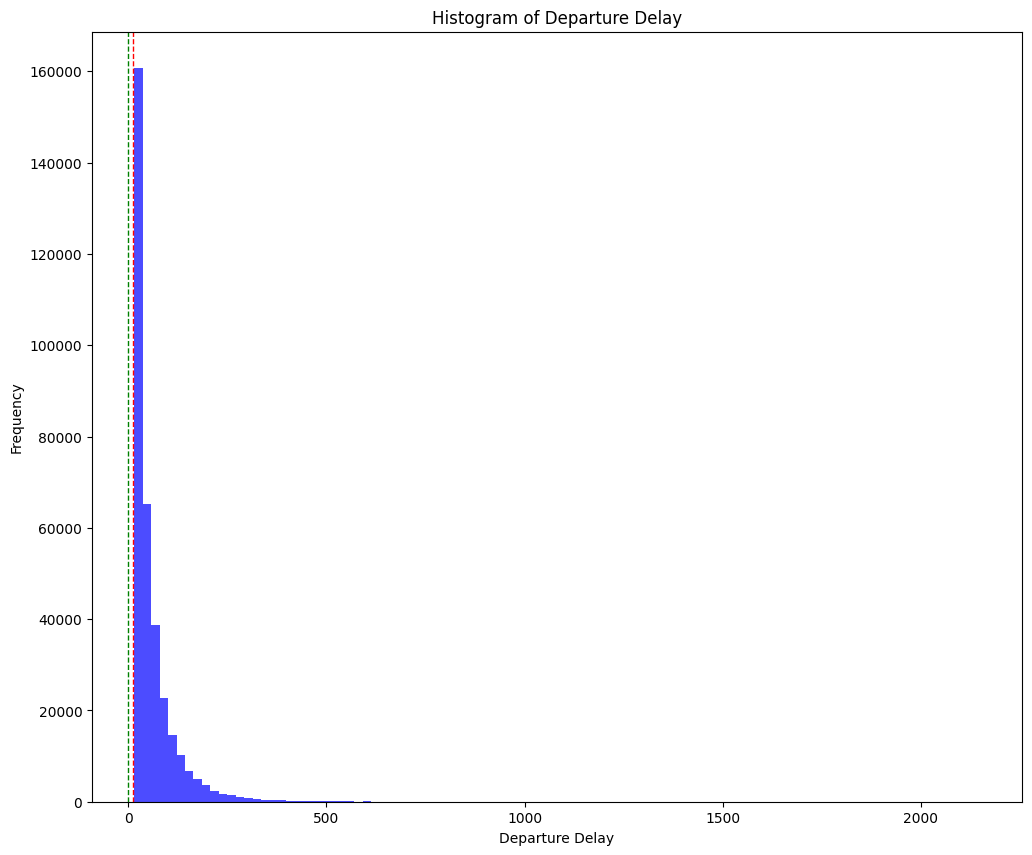

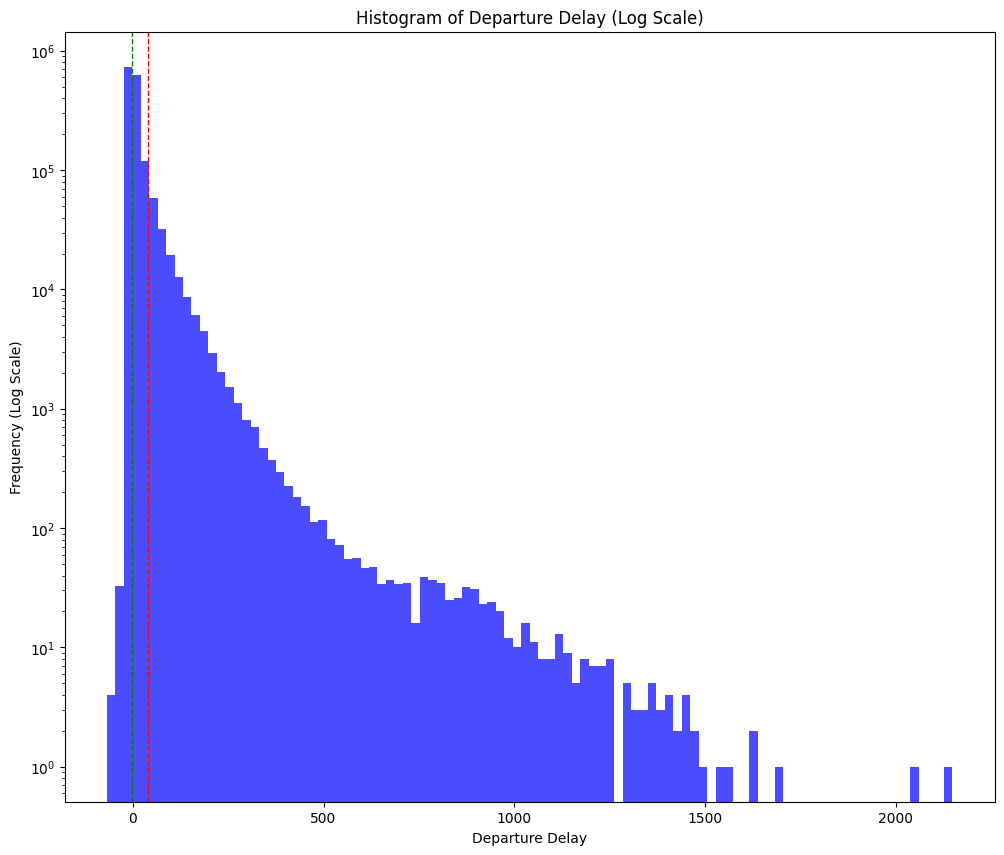

In [64]:
#histogram of departure delay frequency
plt.figure(figsize=(12, 10))
#only delays longer than 15 minutes
plt.hist(df['DepDelay'], bins=100, color='blue', alpha=0.7, range=(15, np.max(df['DepDelay'])))
plt.xlabel('Departure Delay')
plt.ylabel('Frequency')
plt.title('Histogram of Departure Delay')
plt.axvline(df['DepDelay'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(df['DepDelay'].median(), color='green', linestyle='dashed', linewidth=1)
#plt.savefig('graphics/hist_dep_delay.png')

#and the logged version
plt.figure(figsize=(12, 10))
#only delays longer than 15 minutes
plt.hist(df['DepDelay'], bins=100, color='blue', alpha=0.7,)
plt.xlabel('Departure Delay')
plt.ylabel('Frequency (Log Scale)')
plt.title('Histogram of Departure Delay (Log Scale)')
plt.yscale('log')
plt.axvline(x=-1, color='green', linestyle='dashed', linewidth=1)
plt.axvline(x=39, color='red', linestyle='dashed', linewidth=1)
#plt.savefig('graphics/hist_dep_delay_log.png')

In [59]:
#summary statistics about the departure delay
print('Min:', df['DepDelay'].min())
print('Max:', df['DepDelay'].max())
print('Mean:', df['DepDelay'].mean())
print('Median:', df['DepDelay'].median())
print('Mode:', df['DepDelay'].mode())
print('Standard Deviation:', df['DepDelay'].std())
print('Skew:', df['DepDelay'].skew())

# Calculating the ratio of DepDelay < 0 to DepDelay > 0
negative_delays = df[df['DepDelay'] < 0].shape[0]
positive_delays = df[df['DepDelay'] > 0].shape[0]

ratio = negative_delays / positive_delays
print(f'Ratio of DepDelay < 0 to DepDelay > 0: {ratio:.2f}')


#delay stats for delays greater than 15 minutes
print('Summary statistics for flights with a departure delay greater than 15 minutes:')
delayed_flights = df[df['DepDelay'] >= 15]
print('Min:', delayed_flights['DepDelay'].min())
print('Max:', delayed_flights['DepDelay'].max())
print('Mean:', delayed_flights['DepDelay'].mean())
print('Median:', delayed_flights['DepDelay'].median())
print('Mode:', delayed_flights['DepDelay'].mode())
print('Standard Deviation:', delayed_flights['DepDelay'].std())
print('Skew:', delayed_flights['DepDelay'].skew())

# Calculating the ratio of DepDelay < 15 to DepDelay > 15
negative_delays = delayed_flights[delayed_flights['DepDelay'] < 15].shape[0]
positive_delays = delayed_flights[delayed_flights['DepDelay'] >= 15].shape[0]

ratio = negative_delays / positive_delays
print(f'Ratio of DepDelay < 15 to DepDelay > 15: {ratio:.2f}')


Min: -68.0
Max: 2149.0
Mean: 11.53406553993222
Median: -1.0
Mode: 0   -3.0
Name: DepDelay, dtype: float64
Standard Deviation: 40.341350425245615
Skew: 8.48420257120976
Ratio of DepDelay < 0 to DepDelay > 0: 1.25
Summary statistics for flights with a departure delay greater than 15 minutes:
Min: 15.0
Max: 2149.0
Mean: 60.556226884042964
Median: 39.0
Mode: 0    15.0
Name: DepDelay, dtype: float64
Standard Deviation: 69.01178021857345
Skew: 5.7660868331599096
Ratio of DepDelay < 15 to DepDelay > 15: 0.00


In [33]:
#percentage of flights that are delayed
delayed_flights = df[df['DepDelay'] > 15].shape[0]
total_flights = df.shape[0]
percentage = (delayed_flights / total_flights) * 100
print(f'Percentage of flights that are delayed: {percentage:.2f}%')

Percentage of flights that are delayed: 19.87%


In [7]:
# create a new target: delay_binary
# set to 0 if DepDelay is less than or equal to 0 and 1 DepDelay it is greater than 0
df_nums['delay_binary'] = np.where(df_nums['DepDelay'] <= 0, 0, 1)

In [8]:
# create a new target: delay_interval
# 0 for DepDelay<=0, 1 for 0-5, 2 for 5-15, etc. and 13 for DepDelay > 480
bins = [-np.inf, 0, 5, 15, 30, 60, 120, 240, 480, np.inf]
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]  
df_nums['delay_interval'] = pd.cut(df_nums['DepDelay'], bins=bins, labels=labels)

bin_counts = df_nums['delay_interval'].value_counts().sort_index()
print("Counts per delay interval:")
print(bin_counts)

Counts per delay interval:
delay_interval
0    953082
1    188705
2    171911
3    119619
4    100529
5     68756
6     29604
7      6116
8      1106
Name: count, dtype: int64


Text(0.5, 1.0, 'Correlation Heatmap with delay_binary')

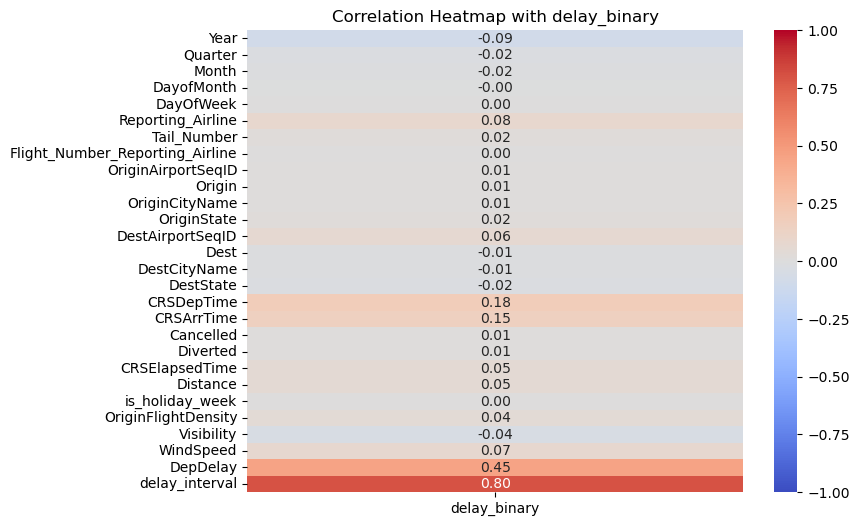

In [9]:
corr = df_nums.corr()
dep_delay_corr = corr[['delay_binary']].drop('delay_binary') 

plt.figure(figsize=(8, 6))
sns.heatmap(dep_delay_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap with delay_binary')

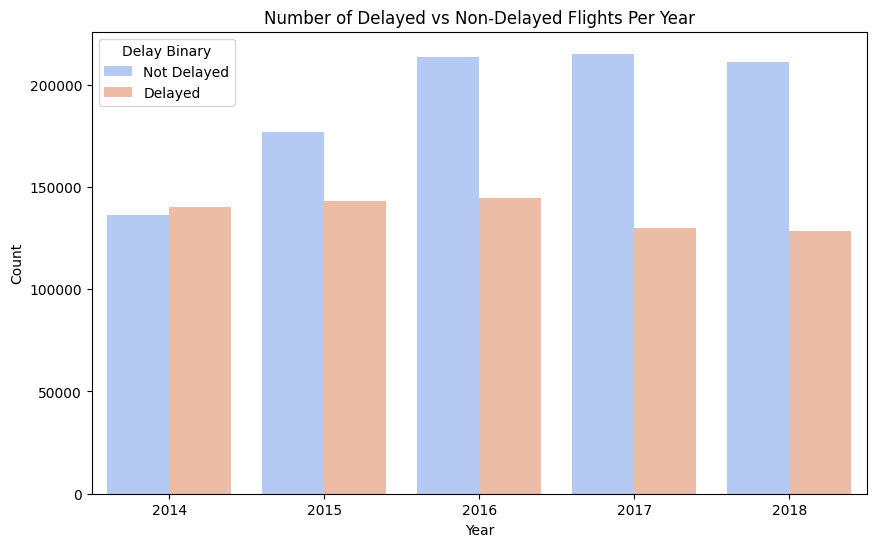

In [34]:
plt.figure(figsize=(10, 6))  
sns.countplot(x='Year', hue='delay_binary', data=df_nums, palette='coolwarm')
plt.title('Number of Delayed vs Non-Delayed Flights Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Delay Binary', labels=['Not Delayed', 'Delayed'])
#plt.savefig('graphics/year_delay_binary.png')

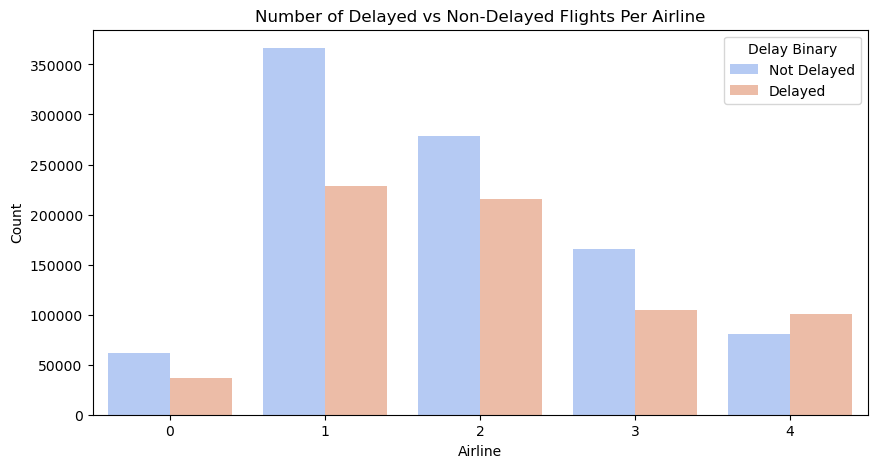

In [11]:
# Original: ['OO' 'AA' 'UA' 'DL' 'WN']
# Converted: [0 1 2 3 4]
plt.figure(figsize=(10, 5))  
sns.countplot(x='Reporting_Airline', hue='delay_binary', data=df_nums, palette='coolwarm')
plt.title('Number of Delayed vs Non-Delayed Flights Per Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Delay Binary', labels=['Not Delayed', 'Delayed'])

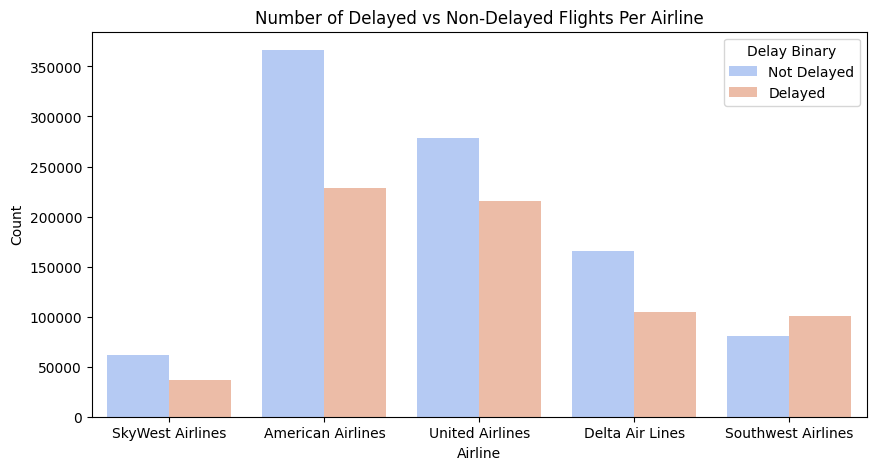

In [37]:
# Original: ['OO' 'AA' 'UA' 'DL' 'WN']
# Converted: ["SkyWest Airlines" "American Airlines" "United Airlines" "Delta Air Lines" "Southwest Airlines"]
airlines = df['Reporting_Airline'].unique()
airline_names = ['SkyWest Airlines', 'American Airlines', 'United Airlines', 'Delta Air Lines', 'Southwest Airlines']
airline_dict = dict(zip(airlines, airline_names))

df_nums['Reporting_Airline'] = df['Reporting_Airline'].map(airline_dict)

plt.figure(figsize=(10, 5))
sns.countplot(x='Reporting_Airline', hue='delay_binary', data=df_nums, palette='coolwarm')
plt.title('Number of Delayed vs Non-Delayed Flights Per Airline')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.legend(title='Delay Binary', labels=['Not Delayed', 'Delayed'])
#plt.savefig('graphics/airline_delay.png')

df_nums.drop(['Reporting_Airline'], axis=1, inplace=True)

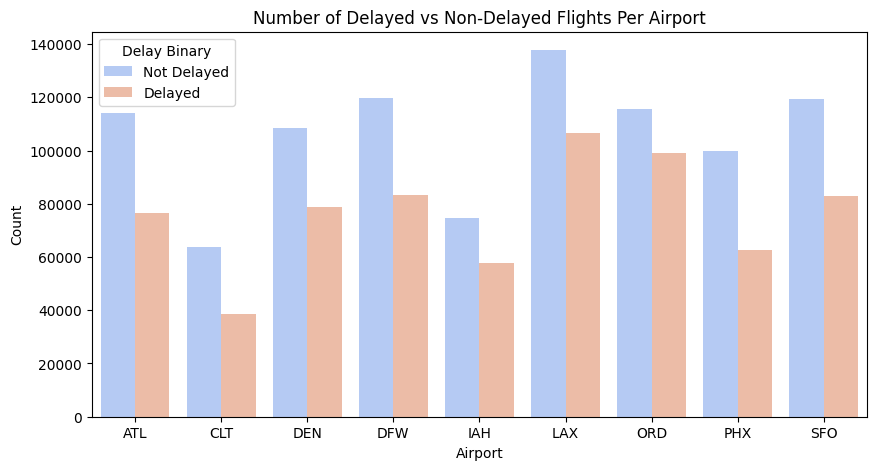

In [39]:
#delay flights by airport
# Original: ['ATL' 'CLT' 'DEN' 'DFW' 'IAH' 'LAX' 'ORD' 'PHX' 'SFO']
#Converted: [0 1 2 3 4 5 6 7 8]
airports = df['Origin'].unique()
airport_names = ['ATL', 'CLT', 'DEN', 'DFW', 'IAH', 'LAX', 'ORD', 'PHX', 'SFO']
airport_dict = dict(zip(airports, airport_names))

df_nums['Origin_name'] = df['Origin'].map(airport_dict)

plt.figure(figsize=(10, 5))
sns.countplot(x='Origin_name', hue='delay_binary', data=df_nums, palette='coolwarm')
plt.title('Number of Delayed vs Non-Delayed Flights Per Airport')
plt.xlabel('Airport')
plt.ylabel('Count')
plt.legend(title='Delay Binary', labels=['Not Delayed', 'Delayed'])
#plt.savefig('graphics/airport_delay.png')

df_nums.drop(['Origin_name'], axis=1, inplace=True)


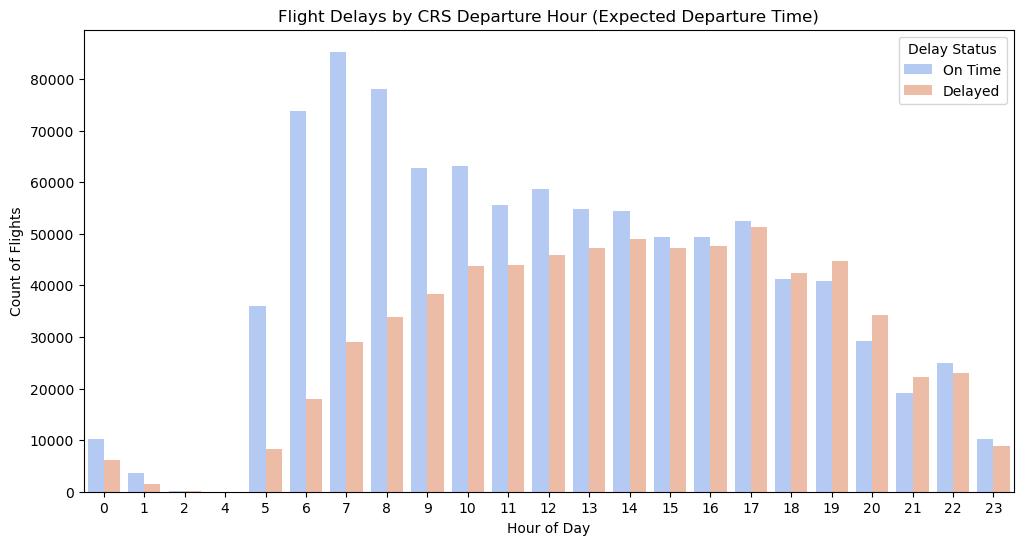

In [13]:
df_nums_copy = df_nums.copy()
df_nums_copy['Hour'] = df_nums_copy['CRSDepTime'] // 100

plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', hue='delay_binary', data=df_nums_copy, palette='coolwarm')
plt.title('Flight Delays by CRS Departure Hour (Expected Departure Time)')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Status', labels=['On Time', 'Delayed'])
#plt.savefig('graphics/hourly_delays_departure.png')

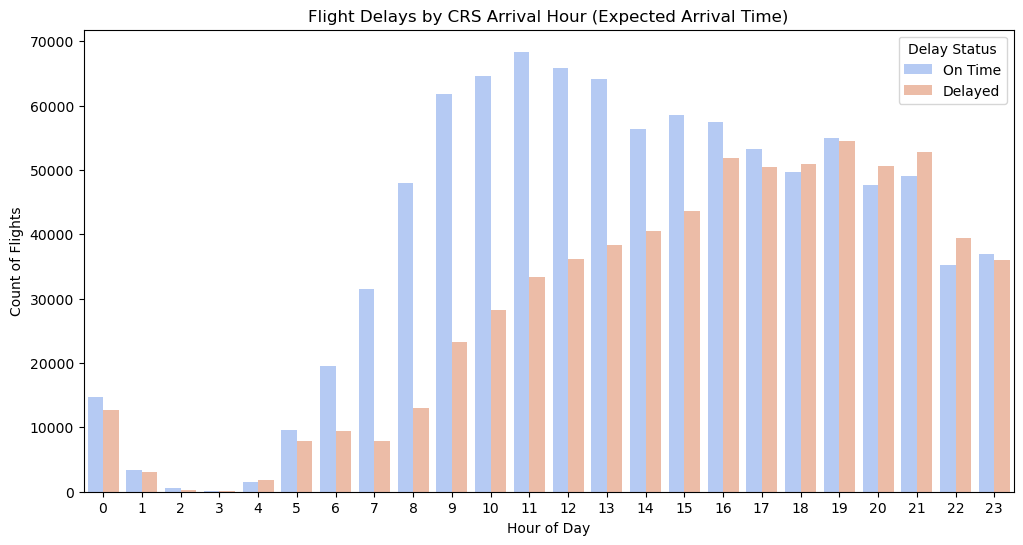

In [14]:
df_nums_copy = df_nums.copy()
df_nums_copy['Hour'] = df_nums_copy['CRSArrTime'] // 100

plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', hue='delay_binary', data=df_nums_copy, palette='coolwarm')
plt.title('Flight Delays by CRS Arrival Hour (Expected Arrival Time)')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Status', labels=['On Time', 'Delayed'])
#plt.savefig('graphics/hourly_delays_arrival.png')

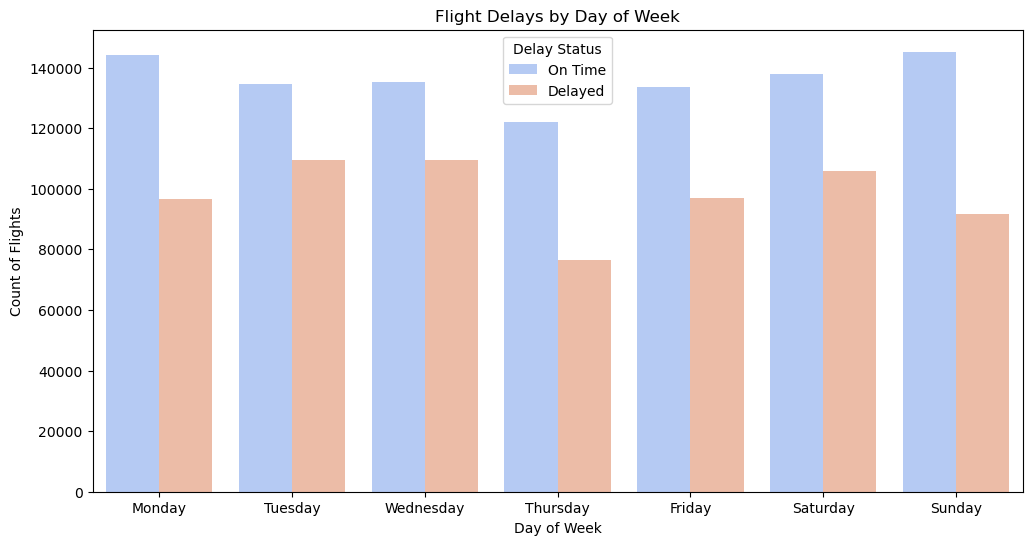

In [15]:
#make the same plot but for day of week
#make it the actual name of the day
# Original: [1 2 3 4 5 6 7]
# Converted: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday' 'Saturday' 'Sunday']
days = df['DayOfWeek'].unique()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_dict = dict(zip(days, day_names))

df_nums_copy = df_nums.copy()
df_nums_copy['DayOfWeek'] = df_nums_copy['DayOfWeek'].map(day_dict)


plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfWeek', hue='delay_binary', data=df_nums_copy, palette='coolwarm')
plt.title('Flight Delays by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Status', labels=['On Time', 'Delayed'])
#plt.savefig('graphics/delay_by_day_of_week.png')

Text(0, 0.5, 'Origin Flight Density')

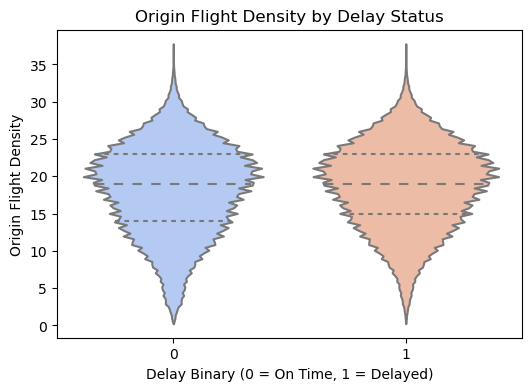

In [16]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='delay_binary', y='OriginFlightDensity', data=df_nums, inner='quartile', palette='coolwarm')
plt.title('Origin Flight Density by Delay Status')
plt.xlabel('Delay Binary (0 = On Time, 1 = Delayed)')
plt.ylabel('Origin Flight Density')

Text(0, 0.5, 'WindSpeed')

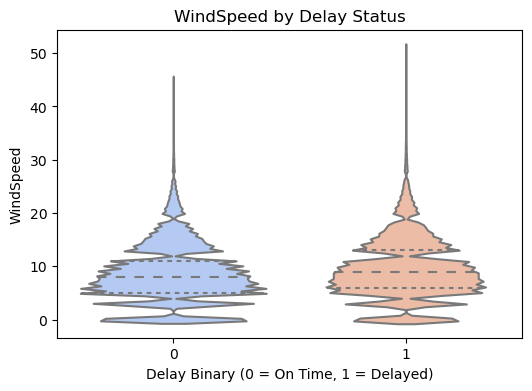

In [17]:
plt.figure(figsize=(6, 4))
sns.violinplot(x='delay_binary', y='WindSpeed', data=df_nums, inner='quartile', palette='coolwarm')
plt.title('WindSpeed by Delay Status')
plt.xlabel('Delay Binary (0 = On Time, 1 = Delayed)')
plt.ylabel('WindSpeed')

Text(0.5, 1.0, 'Correlation Heatmap with delay_interval')

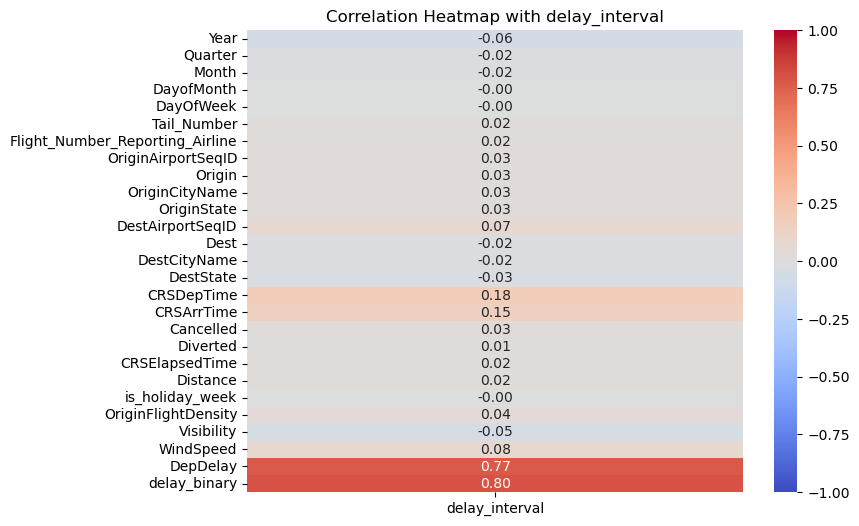

In [18]:
corr = df_nums.corr()
dep_delay_corr = corr[['delay_interval']].drop('delay_interval') 

plt.figure(figsize=(8, 6))
sns.heatmap(dep_delay_corr, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap with delay_interval')

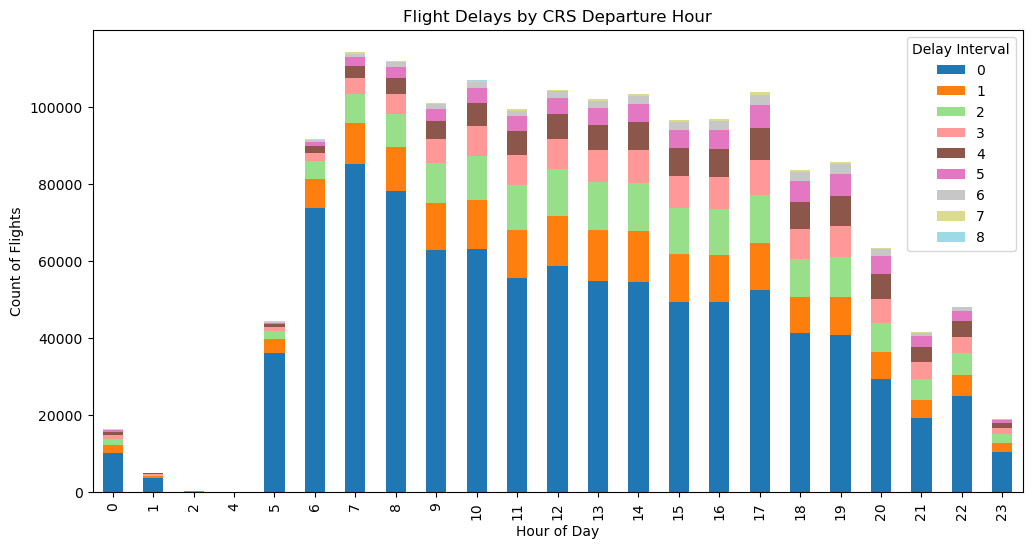

In [19]:
df_nums_copy = df_nums.copy()
df_nums_copy['Hour'] = df_nums_copy['CRSDepTime'] // 100

hourly_delay_distribution = pd.crosstab(df_nums_copy['Hour'], df_nums_copy['delay_interval'])

hourly_delay_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Flight Delays by CRS Departure Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Interval')

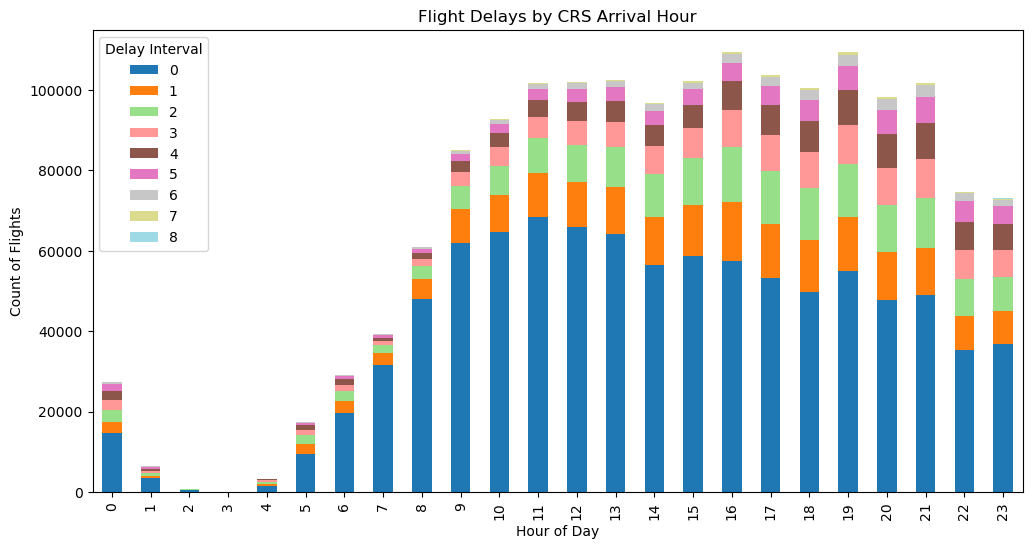

In [20]:
df_nums_copy = df_nums.copy()
df_nums_copy['Hour'] = df_nums_copy['CRSArrTime'] // 100

hourly_delay_distribution = pd.crosstab(df_nums_copy['Hour'], df_nums_copy['delay_interval'])

hourly_delay_distribution.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Flight Delays by CRS Arrival Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Flights')
plt.legend(title='Delay Interval')

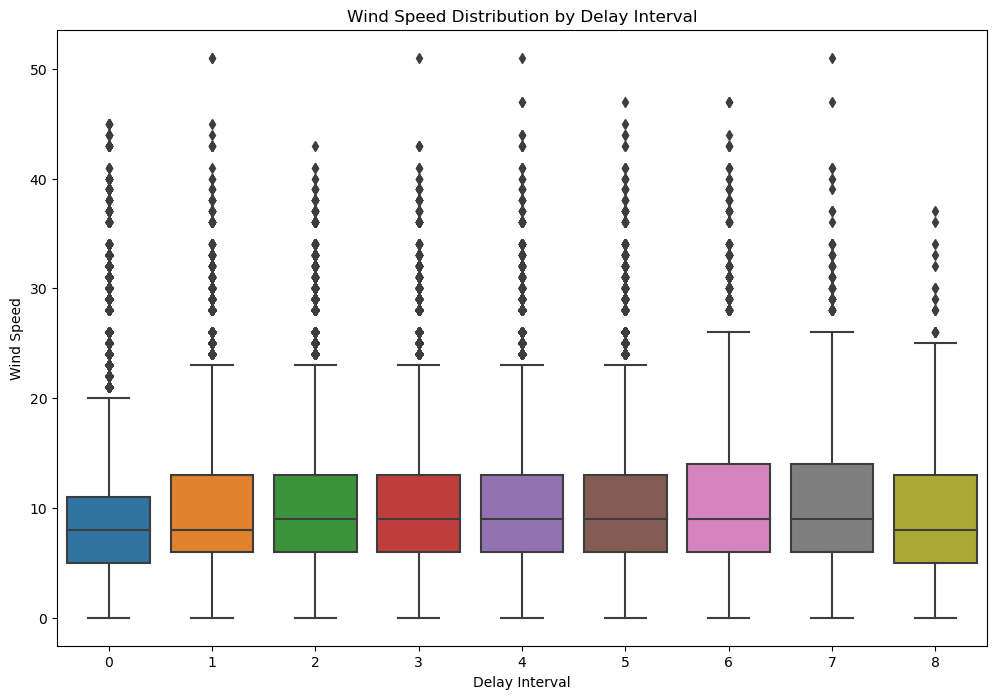

In [21]:
plt.figure(figsize=(12, 8))

# Create a box plot
sns.boxplot(x='delay_interval', y='WindSpeed', data=df_nums)
plt.title('Wind Speed Distribution by Delay Interval')
plt.xlabel('Delay Interval')
plt.ylabel('Wind Speed')
plt.show()

Explained Variance:  [1.39594046e-01 1.12980348e-01 9.09634332e-02 7.49149160e-02
 7.16598182e-02 5.65831882e-02 4.35160838e-02 3.94844291e-02
 3.66774903e-02 3.57532949e-02 3.56652980e-02 3.53442444e-02
 3.47383949e-02 3.34639259e-02 3.20169581e-02 3.09685035e-02
 2.89397637e-02 2.39921992e-02 1.94001160e-02 1.19337336e-02
 5.45802918e-03 3.16706082e-03 1.04280580e-03 8.38753763e-04
 5.42695528e-04 3.60470597e-04 6.64718920e-34 6.64718920e-34]


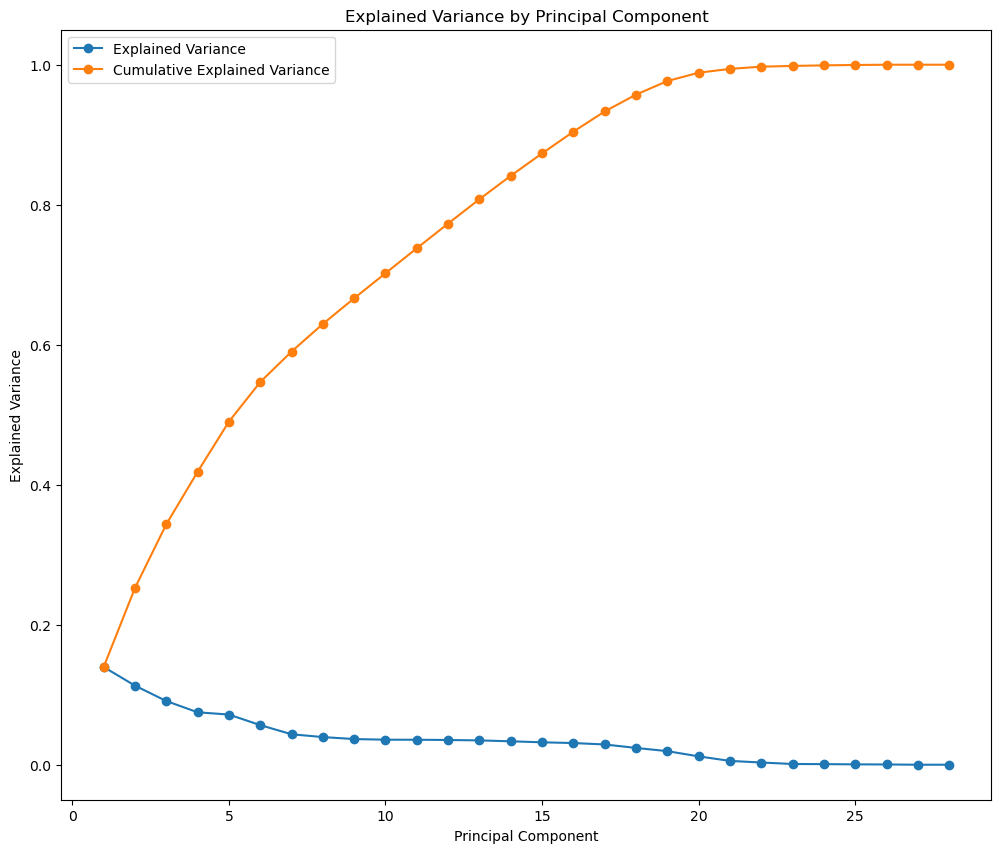

In [22]:
#Finding the principal components

#standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_nums)

#find the principal components
pca = PCA()
pca.fit(df_scaled)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance: ", explained_variance)

#plot the explained variance and cumulative explained variance
plt.figure(figsize=(12, 10))
plt.plot(range(1, len(explained_variance)+1), explained_variance, marker='o', label='Explained Variance')
plt.plot(range(1, len(explained_variance)+1), explained_variance.cumsum(), marker='o', label='Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Principal Component')
plt.legend()

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18]),
 [Text(0.0, 0, '0.00'),
  Text(0.02, 0, '0.02'),
  Text(0.04, 0, '0.04'),
  Text(0.06, 0, '0.06'),
  Text(0.08, 0, '0.08'),
  Text(0.1, 0, '0.10'),
  Text(0.12, 0, '0.12'),
  Text(0.14, 0, '0.14'),
  Text(0.16, 0, '0.16'),
  Text(0.18, 0, '0.18')])

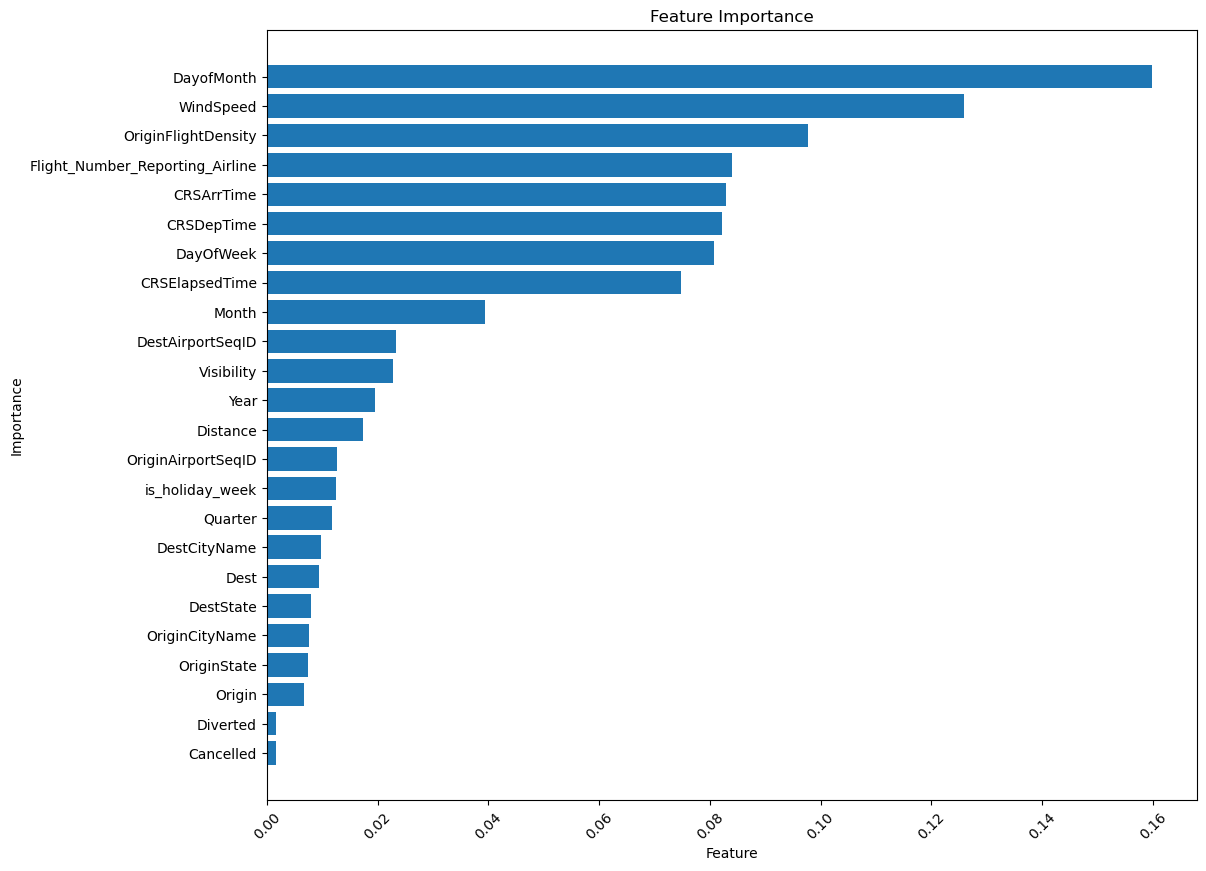

In [23]:
#create a dicision tree to find the most important features

#split the data into features and target
X = df_nums.drop(['DepDelay','delay_interval', 'delay_binary', 'Tail_Number'], axis=1)
y = df_nums['DepDelay']

#fit the decision tree
tree = DecisionTreeRegressor()
tree.fit(X, y)

#plot the feature importances
plt.figure(figsize=(12, 10))
sorted_idx = tree.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], tree.feature_importances_[sorted_idx])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)

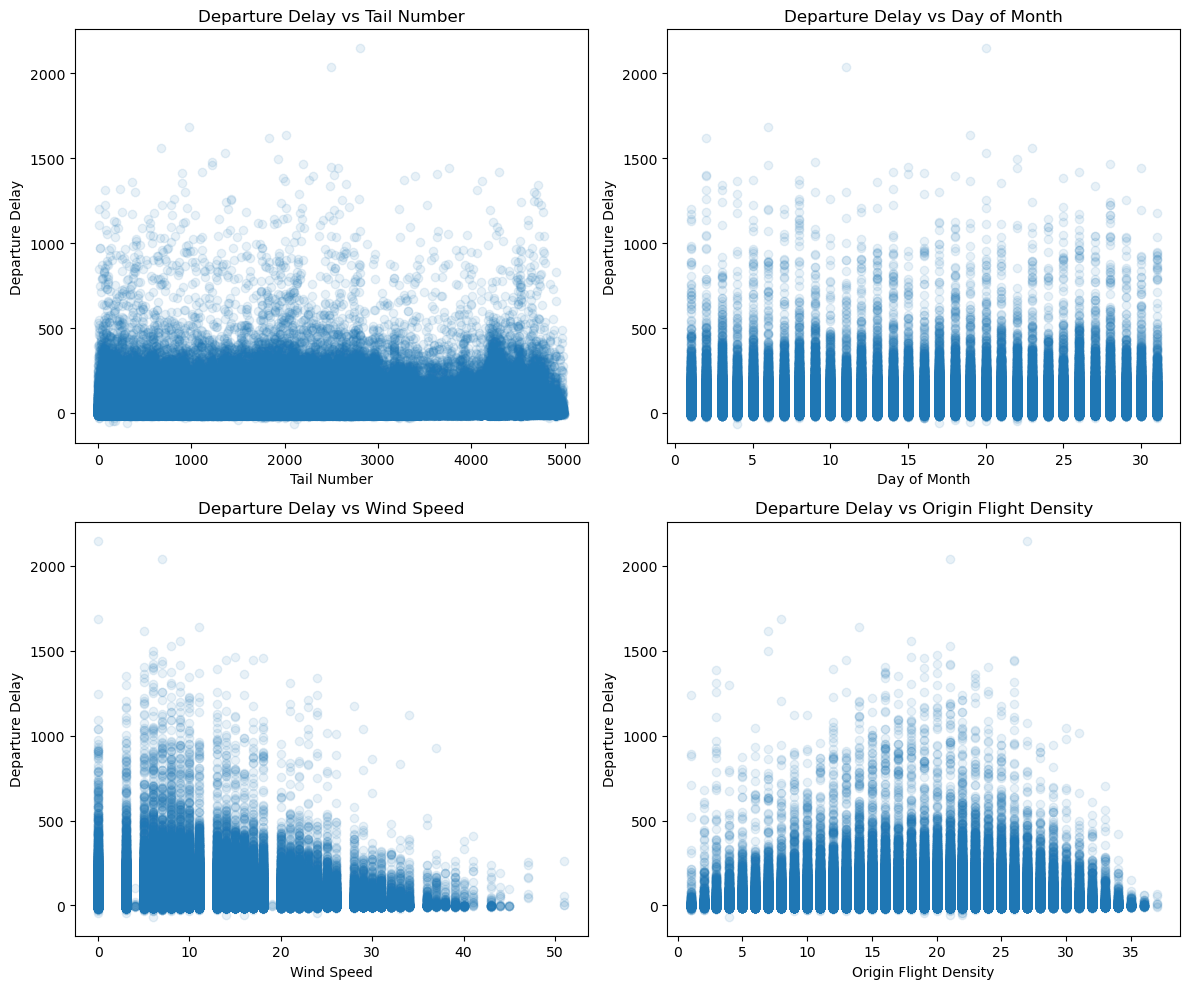

In [24]:
#create a 4x4 grid of scatter plots to show depdelay vs Tail_Number, DayofMonth, WindSpeed, and OriginFlightDensity
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].scatter(df_nums['Tail_Number'], df_nums['DepDelay'], alpha=0.1)
axs[0, 0].set_xlabel('Tail Number')
axs[0, 0].set_ylabel('Departure Delay')
axs[0, 0].set_title('Departure Delay vs Tail Number')

axs[0, 1].scatter(df_nums['DayofMonth'], df_nums['DepDelay'], alpha=0.1)
axs[0, 1].set_xlabel('Day of Month')
axs[0, 1].set_ylabel('Departure Delay')
axs[0, 1].set_title('Departure Delay vs Day of Month')

axs[1, 0].scatter(df_nums['WindSpeed'], df_nums['DepDelay'], alpha=0.1)
axs[1, 0].set_xlabel('Wind Speed')
axs[1, 0].set_ylabel('Departure Delay')
axs[1, 0].set_title('Departure Delay vs Wind Speed')

axs[1, 1].scatter(df_nums['OriginFlightDensity'], df_nums['DepDelay'], alpha=0.1)
axs[1, 1].set_xlabel('Origin Flight Density')
axs[1, 1].set_ylabel('Departure Delay')
axs[1, 1].set_title('Departure Delay vs Origin Flight Density')

plt.tight_layout()

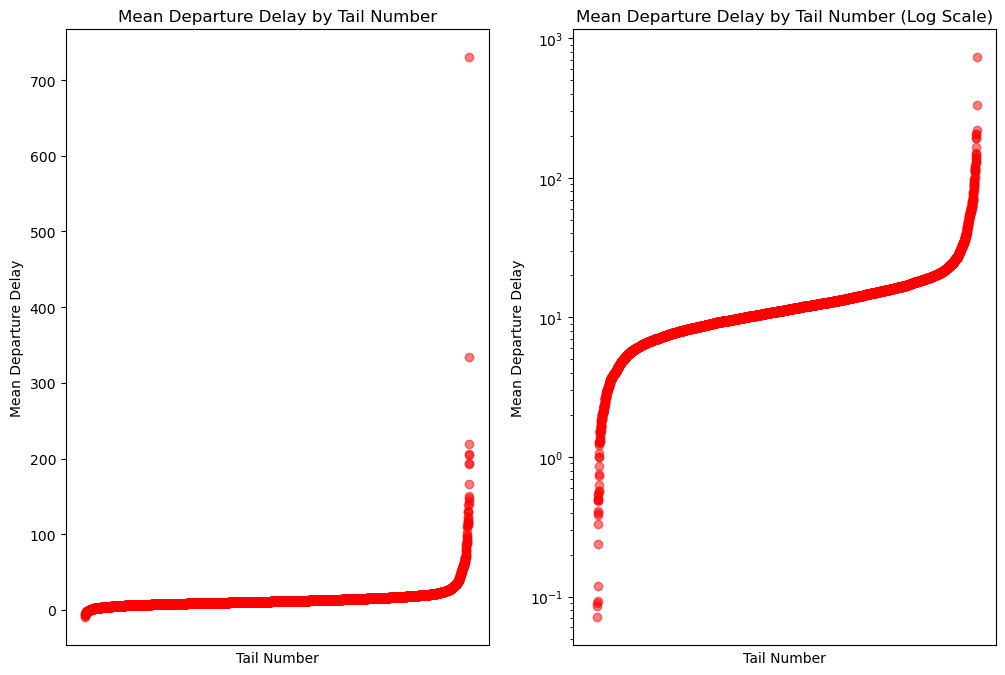

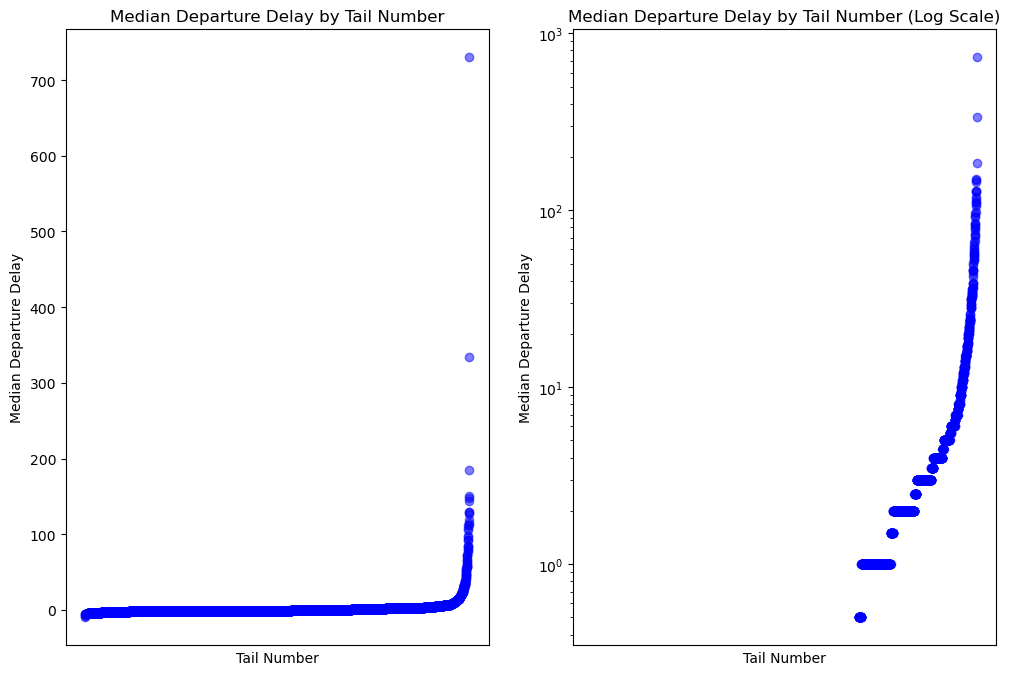

In [25]:
#Looking into why tail number is so important
#scatter plot of mean departure delay by tail number
mean_delay = df.groupby('Tail_Number')['DepDelay'].mean()
mean_delay = mean_delay.sort_values()

median_delay = df.groupby('Tail_Number')['DepDelay'].median()
median_delay = median_delay.sort_values()

#scatter plot of mean and median departure delay by tail number
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].scatter(mean_delay.index, mean_delay, color='red', alpha=0.5)
axs[0].set_xlabel('Tail Number')
axs[0].set_ylabel('Mean Departure Delay')
axs[0].set_title('Mean Departure Delay by Tail Number')
axs[0].set_xticks([])
axs[0].set_yscale('linear')

axs[1].scatter(mean_delay.index, mean_delay, color='red', alpha=0.5)
axs[1].set_xlabel('Tail Number')
axs[1].set_ylabel('Mean Departure Delay')
axs[1].set_title('Mean Departure Delay by Tail Number (Log Scale)')
axs[1].set_xticks([])
axs[1].set_yscale('log')

fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].scatter(median_delay.index, median_delay, color='blue', alpha=0.5)
axs[0].set_xlabel('Tail Number')
axs[0].set_ylabel('Median Departure Delay')
axs[0].set_title('Median Departure Delay by Tail Number')
axs[0].set_xticks([])
axs[0].set_yscale('linear')

axs[1].scatter(median_delay.index, median_delay, color='blue', alpha=0.5)
axs[1].set_xlabel('Tail Number')
axs[1].set_ylabel('Median Departure Delay')
axs[1].set_title('Median Departure Delay by Tail Number (Log Scale)')
axs[1].set_xticks([])
axs[1].set_yscale('log')



#Since tail number is specific to each plane, this shows that some planes are just "unlucky" or "lucky" when it comes to delays

Accuracy: 0.5940509811336867


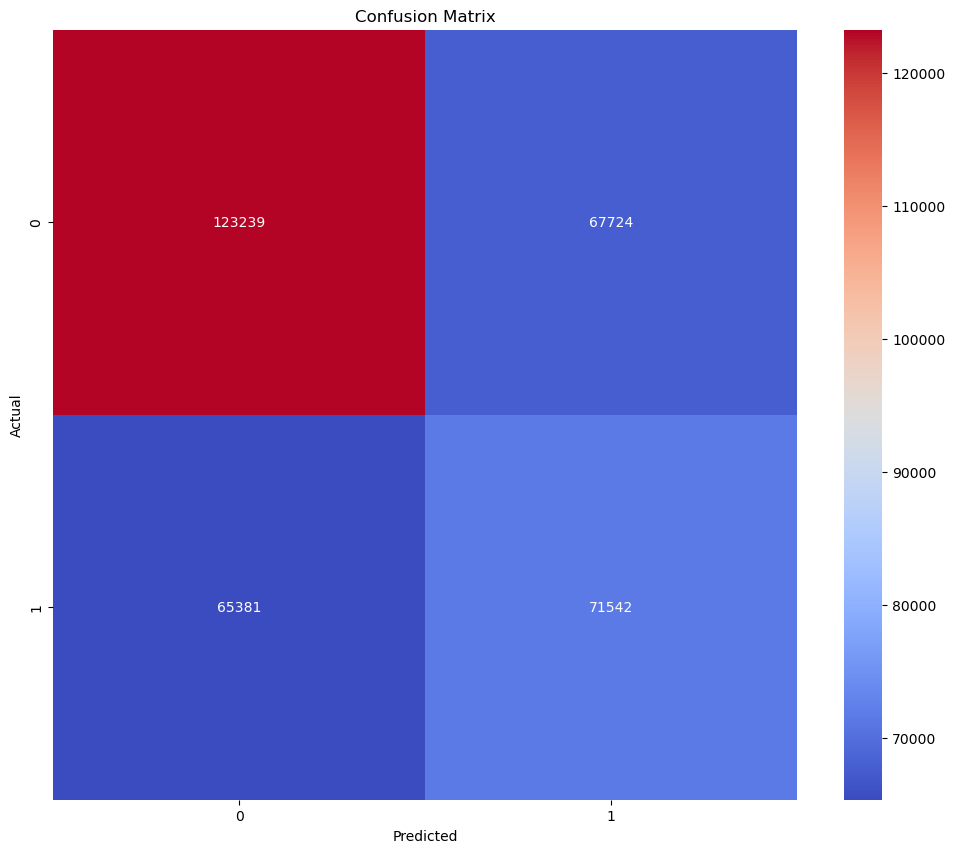

In [28]:
#make a confusion matrix for the decision tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#convert depdelay to binary (0 if on time or early, 1 if delayed)
y = df_nums['DepDelay'].apply(lambda x: 0 if x <= 0 else 1)
#remove tail number since it is specific to each plane
X = df_nums.drop(['DepDelay', 'Tail_Number', 'delay_binary', 'delay_interval'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

accuracy = (conf_matrix[0, 0] + conf_matrix[1, 1]) / len(y_test)
print('Accuracy:', accuracy)

In [29]:
#print out the most important features of the decision tree
importance = tree.feature_importances_
sorted_idx = importance.argsort()
print('Most Important Features:')
for i in range(1, 11):
    print(X.columns[sorted_idx[-i]], importance[sorted_idx[-i]])

Most Important Features:
DayofMonth 0.1877207198368371
WindSpeed 0.1358625704595553
CRSDepTime 0.09771363182549644
OriginFlightDensity 0.0961400252909522
DayOfWeek 0.09284097285184001
CRSArrTime 0.07351150066755133
Flight_Number_Reporting_Airline 0.06699243242965451
CRSElapsedTime 0.06566018484915556
Month 0.047067473637567844
Visibility 0.020499346373966595


In [7]:
#ratios of delayed flights 
delayed_flights = df[df['DepDelay'] > 15].shape[0]
total_flights = df.shape[0]
percentage = (delayed_flights / total_flights) * 100
print(f'Percentage of flights that are delayed: {percentage:.2f}%')

#percentage of flights that are delayed by airline
airlines = df['Reporting_Airline'].unique()
airline_delays = []
for airline in airlines:
    delayed_flights = df[(df['Reporting_Airline'] == airline) & (df['DepDelay'] > 15)].shape[0]
    total_flights = df[df['Reporting_Airline'] == airline].shape[0]
    percentage = (delayed_flights / total_flights) * 100
    airline_delays.append(percentage)

airline_delays = pd.Series(airline_delays, index=airlines)
airline_delays = airline_delays.sort_values()

print('Percentage of flights that are delayed by airline:')
print(airline_delays)

#percentage of flights that are delayed by airport
airports = df['Origin'].unique()
airport_delays = []
for airport in airports:
    delayed_flights = df[(df['Origin'] == airport) & (df['DepDelay'] > 15)].shape[0]
    total_flights = df[df['Origin'] == airport].shape[0]
    percentage = (delayed_flights / total_flights) * 100
    airport_delays.append(percentage)

airport_delays = pd.Series(airport_delays, index=airports)
airport_delays = airport_delays.sort_values()

print('Percentage of flights that are delayed by airport:')
print(airport_delays)

#percentage of flights that are delayed by day of week
days = df['DayOfWeek'].unique()
day_delays = []

for day in days:
    delayed_flights = df[(df['DayOfWeek'] == day) & (df['DepDelay'] > 15)].shape[0]
    total_flights = df[df['DayOfWeek'] == day].shape[0]
    percentage = (delayed_flights / total_flights) * 100
    day_delays.append(percentage)

day_delays = pd.Series(day_delays, index=days)
day_delays = day_delays.sort_index()

print('Percentage of flights that are delayed by day of week:')
print(day_delays)

#percentage of flights that are delayed by airport and airline
airports = df['Origin'].unique()
airlines = df['Reporting_Airline'].unique()
airport_airline_delays = []

for airport in airports:
    for airline in airlines:
        delayed_flights = df[(df['Origin'] == airport) & (df['Reporting_Airline'] == airline) & (df['DepDelay'] > 15)].shape[0]
        total_flights = df[(df['Origin'] == airport) & (df['Reporting_Airline'] == airline)].shape[0]
        if total_flights == 0:
            percentage = 0
        else:
            percentage = (delayed_flights / total_flights) * 100
        airport_airline_delays.append(percentage)

airport_airline_delays = pd.Series(airport_airline_delays, index=pd.MultiIndex.from_product([airports, airlines]))
airport_airline_delays = airport_airline_delays.sort_values()

print('Percentage of flights that are delayed by airport and airline:')
print(airport_airline_delays)


Percentage of flights that are delayed: 19.87%
Percentage of flights that are delayed by airline:
DL    16.500587
AA    18.419858
UA    20.295969
OO    21.319031
WN    27.683563
dtype: float64
Percentage of flights that are delayed by airport:
CLT    16.640750
ATL    17.065565
PHX    17.727194
DEN    19.590453
DFW    20.078744
IAH    20.125492
SFO    21.027933
LAX    21.087255
ORD    22.921988
dtype: float64
Percentage of flights that are delayed by day of week:
1    21.234615
2    17.983143
3    18.743927
4    21.564544
5    21.666456
6    17.289355
7    20.052160
dtype: float64
Percentage of flights that are delayed by airport and airline:
ORD  WN     0.000000
IAH  WN     0.000000
DFW  WN     0.000000
CLT  WN     0.000000
PHX  DL     7.859302
CLT  DL    13.010723
PHX  UA    13.350904
DEN  DL    13.501594
DFW  UA    13.905006
     DL    14.086345
ATL  AA    14.373264
IAH  AA    14.398709
CLT  UA    15.237134
PHX  AA    15.379645
DEN  AA    16.443868
ATL  DL    16.500061
SFO  DL    16.

In [8]:
#check for independance

# Define a function to check independence
def check_independence(p_joint, p_a, p_b):
    expected_p = p_a * p_b
    return "Independent" if abs(p_joint - expected_p) < 1e-4 else "Dependent"

# Existing code: Calculate overall, airline-specific, and airport-specific delay rates
# Continue from existing code here...

# Checking independence for each airline-airport combination
independence_results = pd.Series(dtype=str, index=pd.MultiIndex.from_product([airports, airlines], names=['Airport', 'Airline']))

for airport in airports:
    p_airport = airport_delays[airport] / 100  # Convert percentage to probability
    for airline in airlines:
        p_airline = airline_delays[airline] / 100  # Convert percentage to probability
        index = (airport, airline)
        p_joint = airport_airline_delays[index] / 100  # Convert percentage to probability
        independence_results[index] = check_independence(p_joint, p_airline, p_airport)

print('Independence check results:')
print(independence_results)


Independence check results:
Airport  Airline
ATL      OO         Dependent
         AA         Dependent
         UA         Dependent
         DL         Dependent
         WN         Dependent
CLT      OO         Dependent
         AA         Dependent
         UA         Dependent
         DL         Dependent
         WN         Dependent
DEN      OO         Dependent
         AA         Dependent
         UA         Dependent
         DL         Dependent
         WN         Dependent
DFW      OO         Dependent
         AA         Dependent
         UA         Dependent
         DL         Dependent
         WN         Dependent
IAH      OO         Dependent
         AA         Dependent
         UA         Dependent
         DL         Dependent
         WN         Dependent
LAX      OO         Dependent
         AA         Dependent
         UA         Dependent
         DL         Dependent
         WN         Dependent
ORD      OO         Dependent
         AA         Depen